In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('csvs/bank-full.csv')
df_copy = df.copy()
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='age', ylabel='Count'>

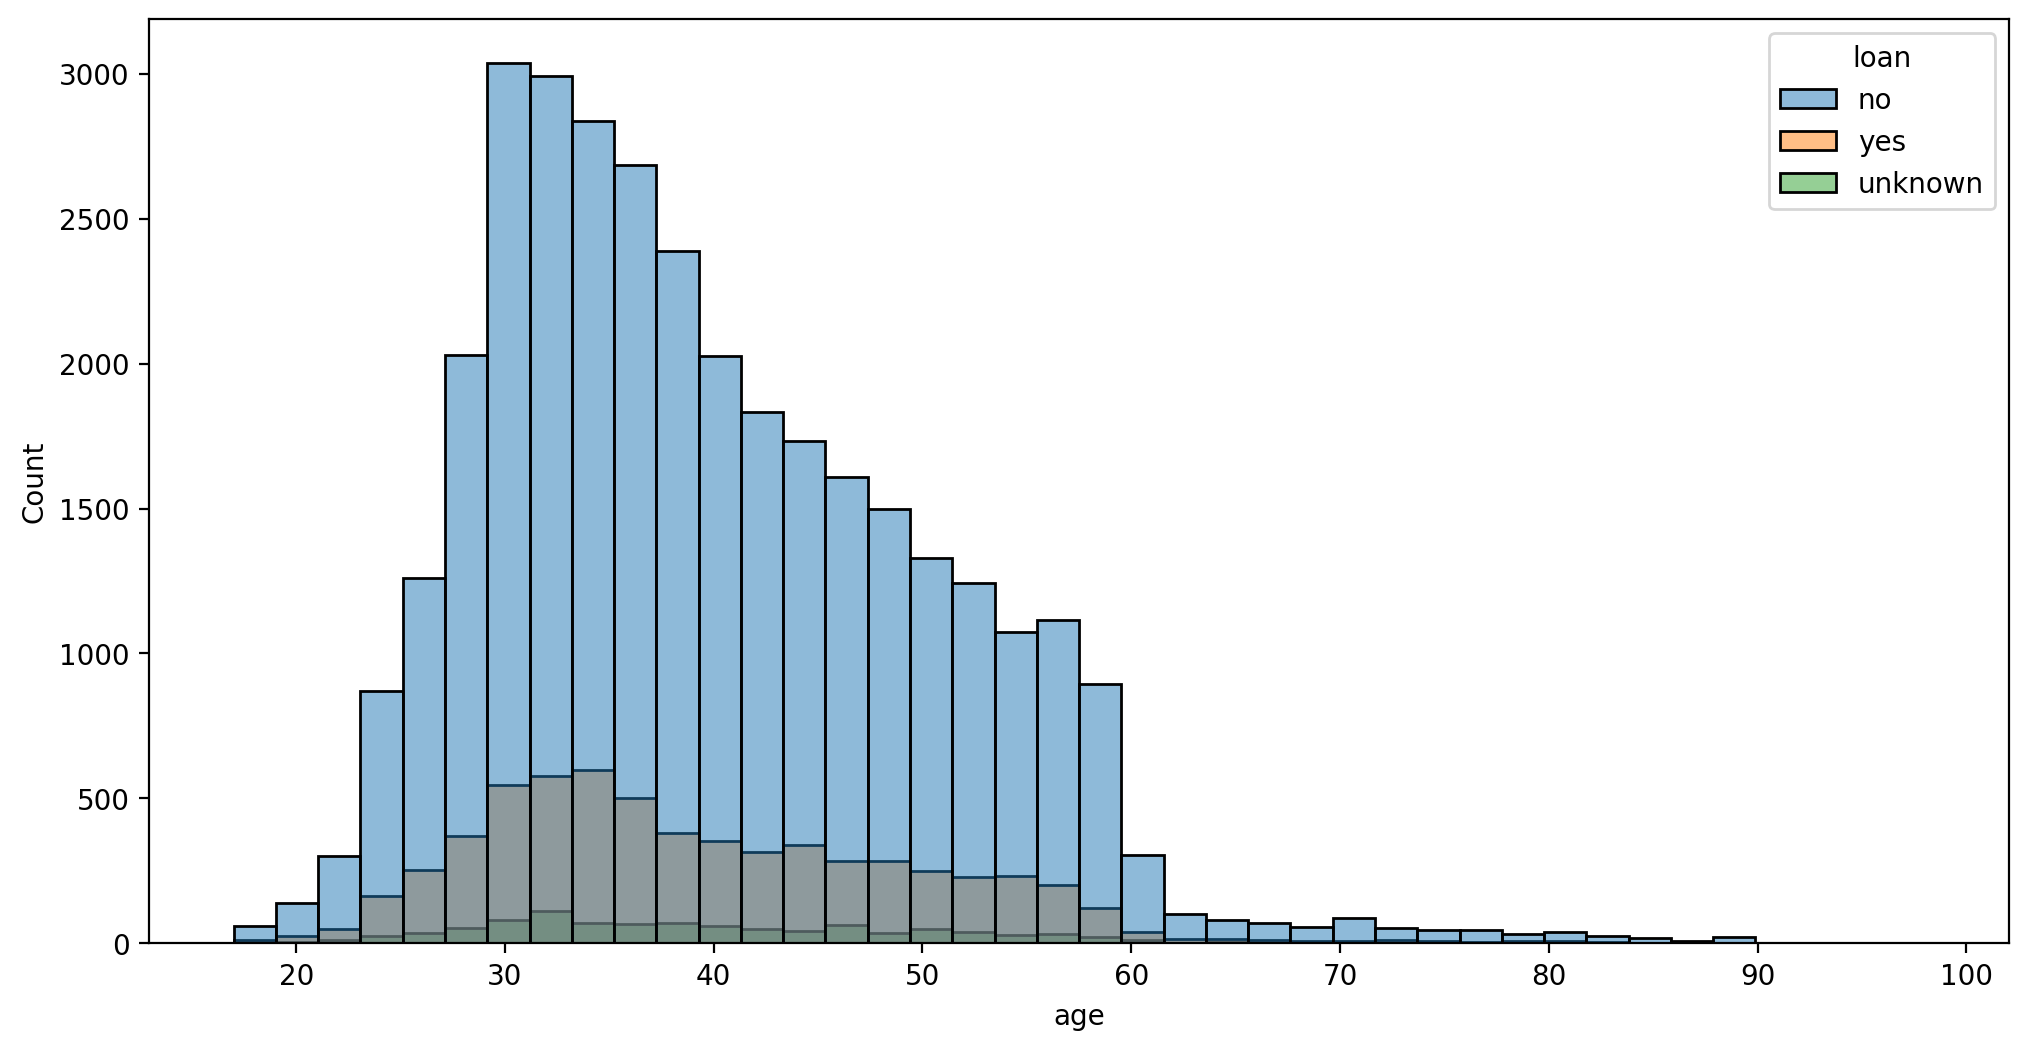

In [3]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df_copy, x='age', bins=40, hue='loan')

In [4]:
# The distribution of the amount of days passed
# before the previous marketing call without
# those with 999 (meaning there was no previous
# marketing call to those customers)

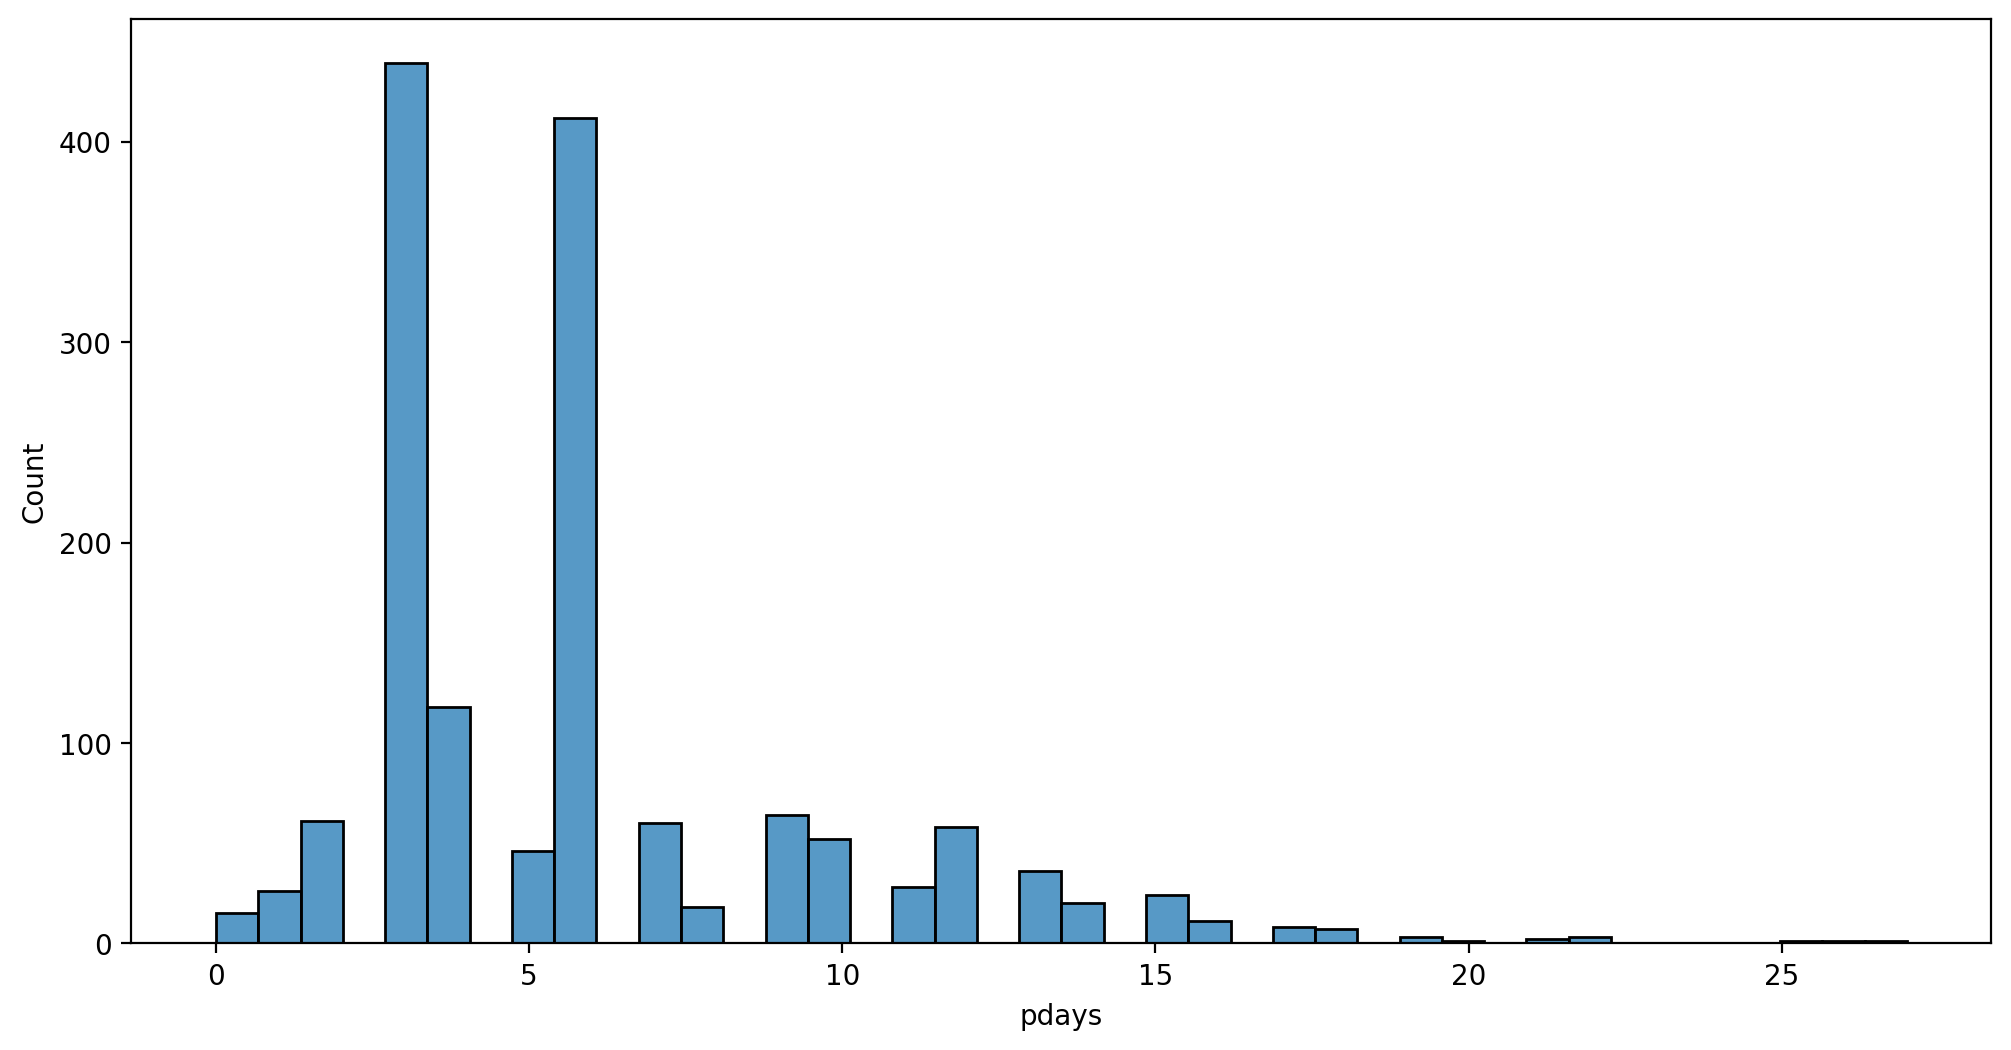

In [5]:
data_df = df_copy[df_copy['pdays'] != 999]
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=data_df, x='pdays', bins=40)
plt.show()

In [6]:
# The distribution of the call duration regarding
# the contact type (telephone or celular)

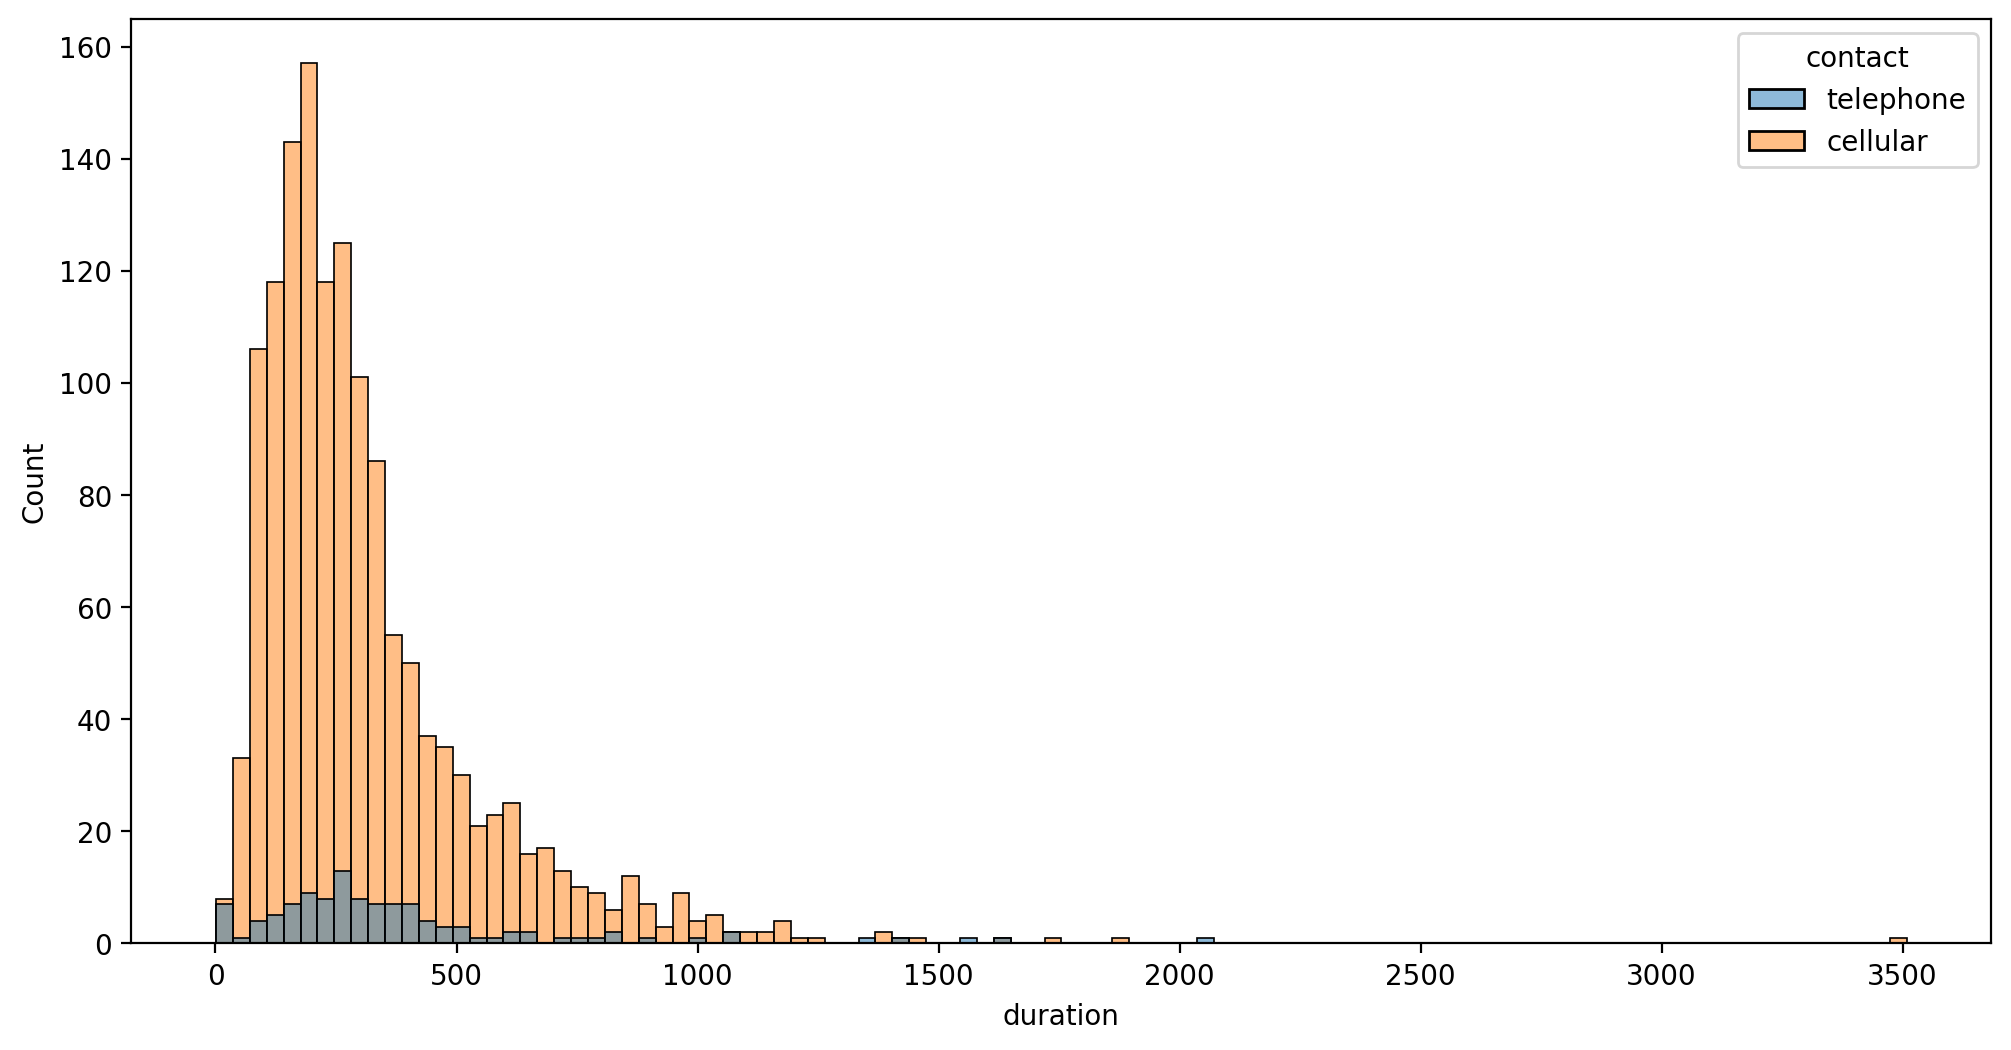

In [7]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=data_df, x='duration', bins=100, hue='contact')
plt.show()

In [8]:
# Customers count regarding the customer
# job category. The chart is sorted from
# highest count to the lowest 

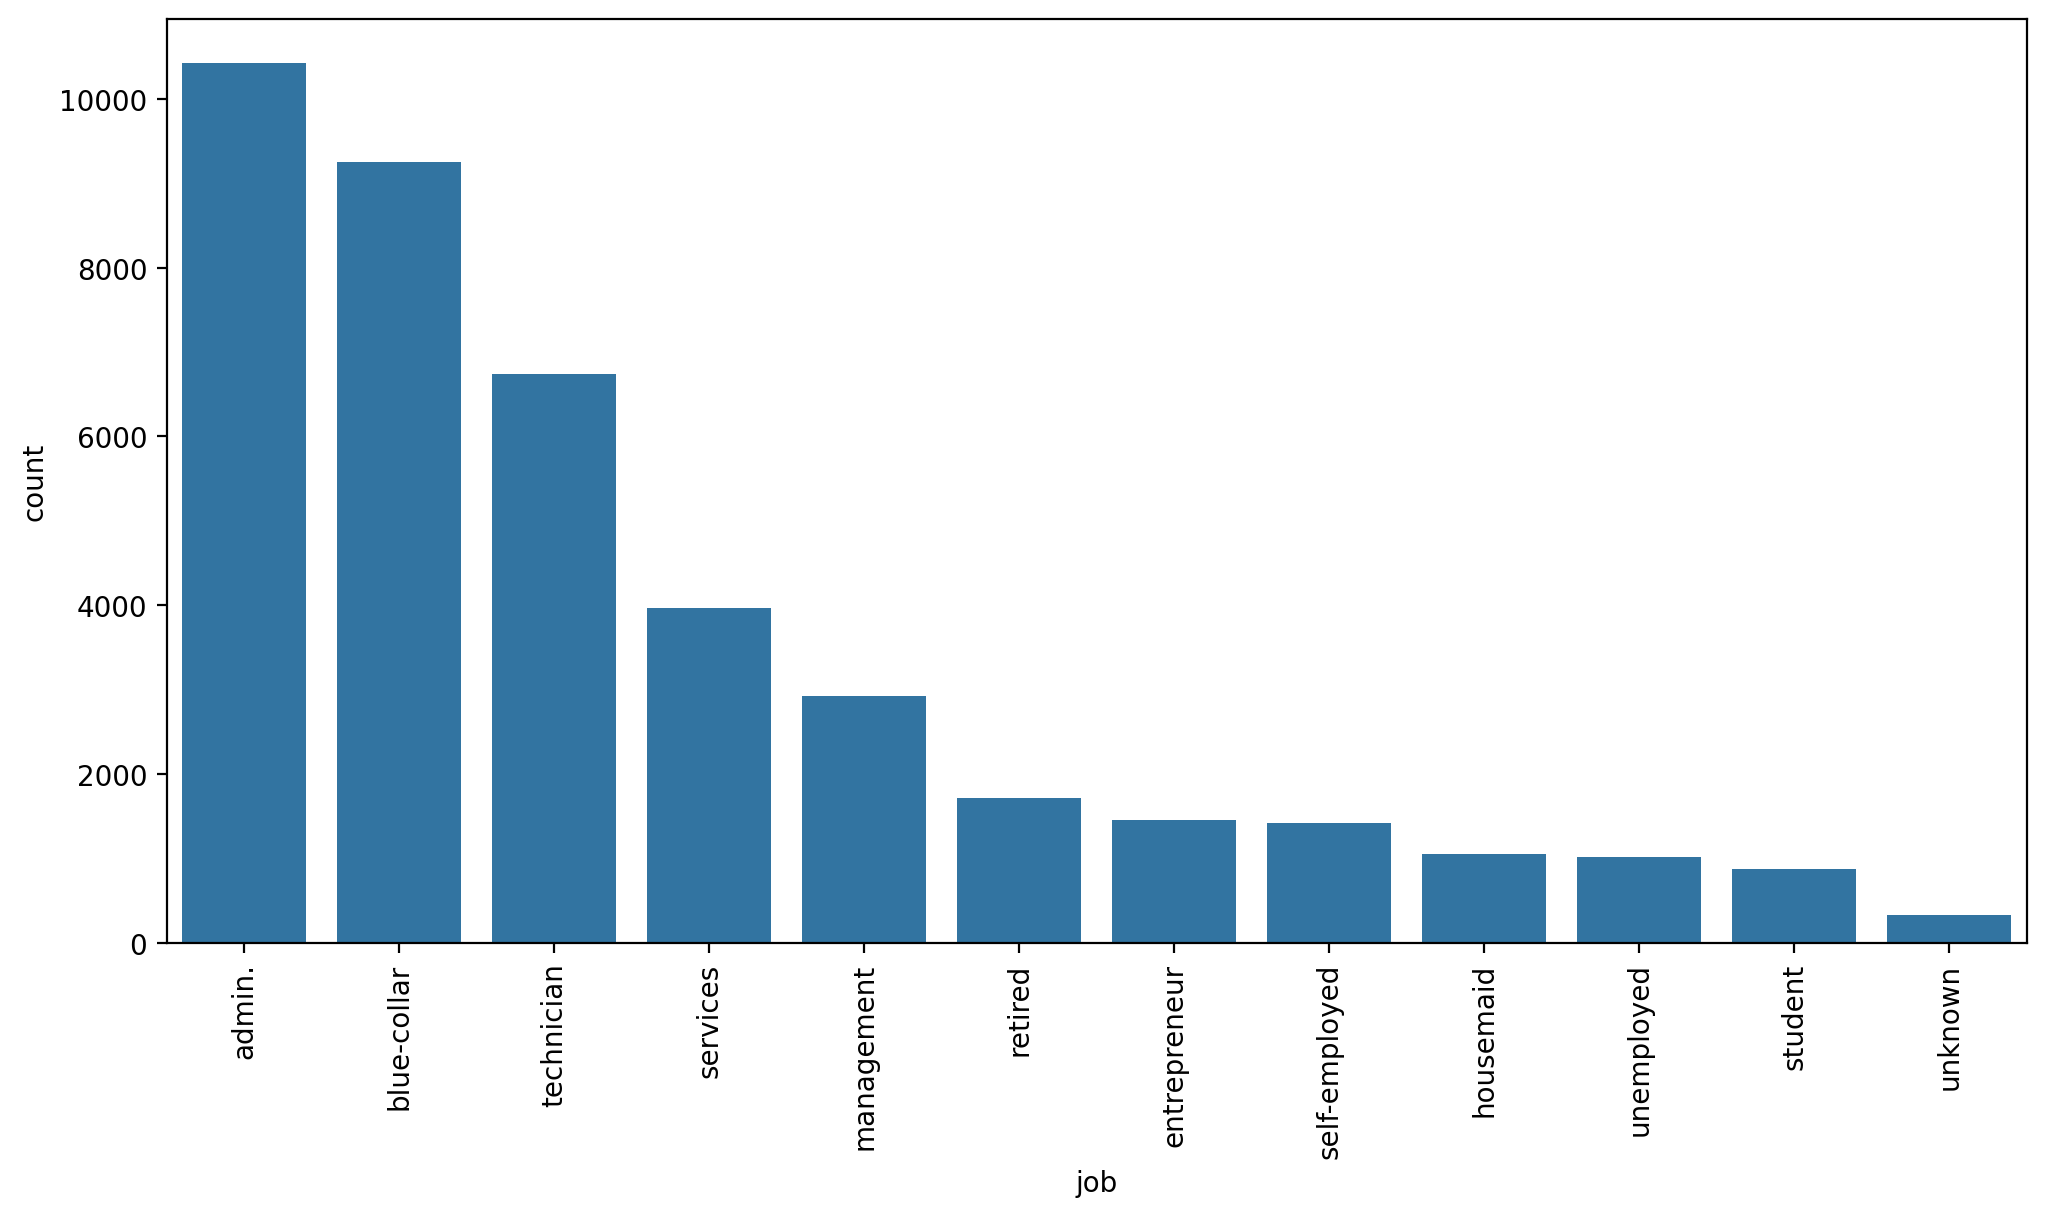

In [9]:
order_jobs_df = df['job'].value_counts().index

plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df, x='job', order=order_jobs_df)
plt.xticks(rotation=90)
plt.show()

In [10]:
# Customers count regarding the customer
# education category. The chart is sorted
# from highest count to the lowest

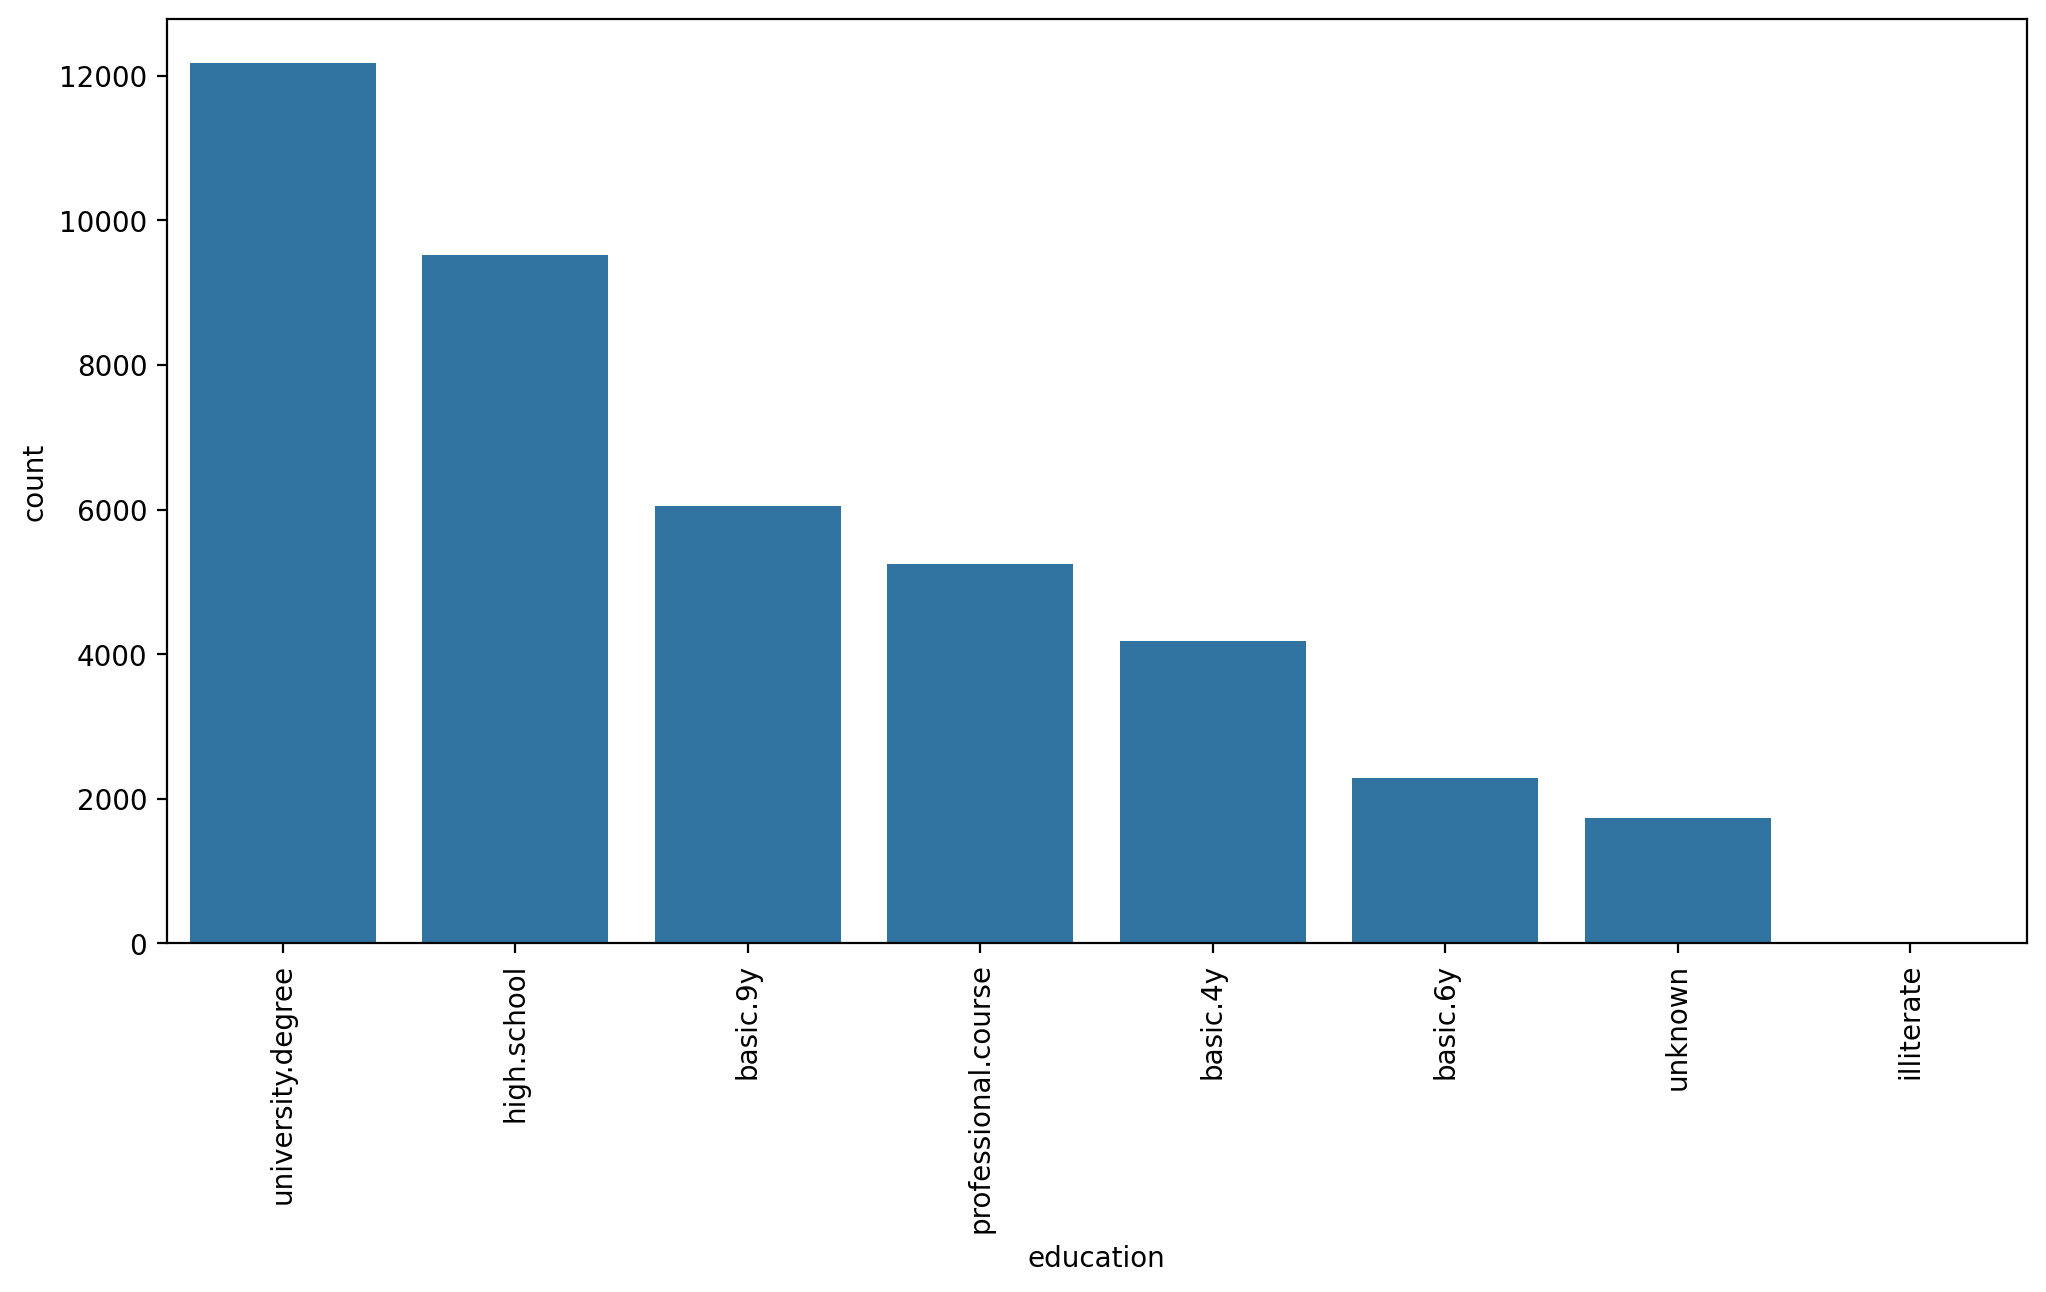

In [11]:
order_jobs_df = df['education'].value_counts().index

plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df, x='education', order=order_jobs_df)
plt.xticks(rotation=90)
plt.show()

In [12]:
X = pd.get_dummies(df_copy)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [13]:
# End of class 19/03

In [14]:
# 23/03 Optimal K Value

In [15]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)

    ssd.append(model.inertia_)

In [16]:
ssd

[2469792.381034949,
 2370786.871245429,
 2323883.586881117,
 2307461.8188756807,
 2214344.4598974693,
 2173370.4374420536,
 2117703.1284298524,
 2066422.3765365211]

<function matplotlib.pyplot.show(close=None, block=None)>

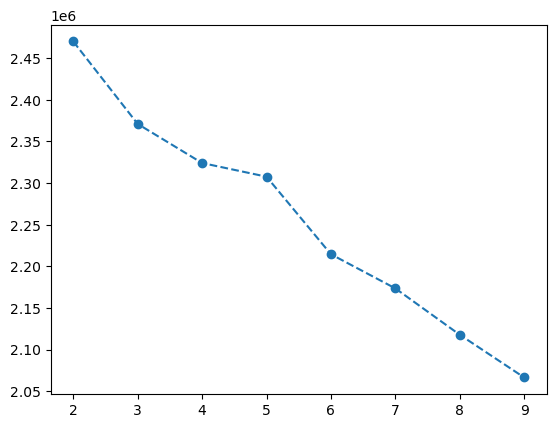

In [17]:
plt.plot(range(2 ,10), ssd, 'o--')
plt.show

In [18]:
# Class Exercise - K-Mean Clustering
# Instructions:
# Your mission is to implement the following:
# ● Run a simple K-Mean Clustering model with K = 3.
# Remember to handle the data properly before start training the model.
# ● Print the cluster center values with cluster_centers_ method and print the prediction values.
# ● Add to the existing dataframe the corresponding cluster prediction values
# ● Run elbow method for K values between 2 and 8 and find what is the optional K value.
# ● Generate a line plot of the elbow method to support your answer. 

In [19]:
df = pd.read_csv('csvs/wine_dataset.csv')
df_copy = df.copy()
df_copy.head()


,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
# Remember to handle the data properly before start training the model.

In [21]:
df_copy.isnull().any()

Unnamed: 0                      False
alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [22]:
print(df_copy['Unnamed: 0'].unique())
# Irrelevant column I will delete
df_copy.drop('Unnamed: 0', axis=1, inplace=True)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]


In [23]:
# Run a simple K-Mean Clustering model with K = 3.
# & print the prediction values.
X = pd.get_dummies(df_copy)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

model = KMeans(n_clusters=3)
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [24]:
# Print the cluster center values with cluster_centers_ method 
model.cluster_centers_

array([[-0.93737314, -0.32697518, -0.49901564,  0.15553544, -0.60924515,
        -0.15886255, -0.02889998,  0.09163235, -0.06628898, -0.89682622,
         0.40081416,  0.21791499, -0.80888103],
       [ 0.73099285, -0.35927074,  0.27951742, -0.57081594,  0.60081095,
         0.86998166,  0.93082599, -0.60905149,  0.6095625 ,  0.10696731,
         0.5003457 ,  0.75021961,  1.02645985],
       [ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461]])

In [25]:
# Add to the existing dataframe the corresponding cluster prediction values
df_copy['cluster_labels'] = cluster_labels

In [26]:
df_copy.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [27]:
# Run elbow method for K values between 2 and 8 and find what is the optional K value.
ssd = []

for k in range(2,8):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)

    ssd.append(model.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

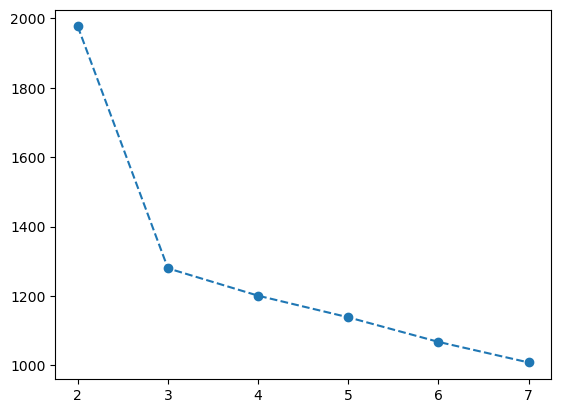

In [28]:
# Generate a line plot of the elbow method to support your answer.
plt.plot(range(2 ,8), ssd, 'o--')
plt.show

In [29]:
#  4 or 3 = K looks good to me ; )

In [30]:
# End of slide 58